In [1]:
import datetime
import operator
import os
import os.path

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

from io import StringIO
from matplotlib import rcParams
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA


# Don't cut xlabel when saving .fig
rcParams.update({'figure.autolayout': True})

# Convert datetime for matplotlib
register_matplotlib_converters()

In [2]:
# Find number of channels in house_1
path = 'low_freq/house_1/'
num_channels = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]) - 1

# Load consumption for house_1
channels = []
for i in range(num_channels):
    ch = pd.read_csv(path + 'channel_{}.dat'.format(i + 1), delimiter=' ', names=['t', 'pot'])
    ch.t = pd.to_datetime(ch.t, unit='s')
    channels.append(ch)

# Load labels from house_1
labels = pd.read_csv(path + 'labels.dat', delimiter=' ', names=['i', 'name'])

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


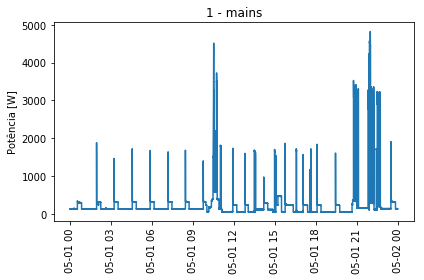

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


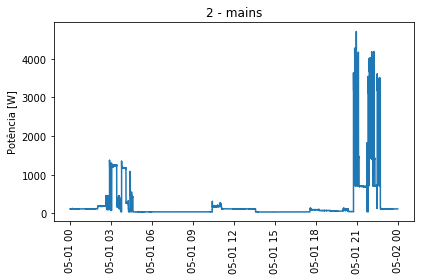

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


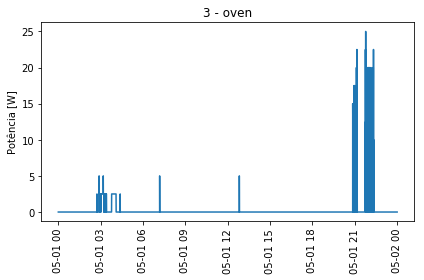

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


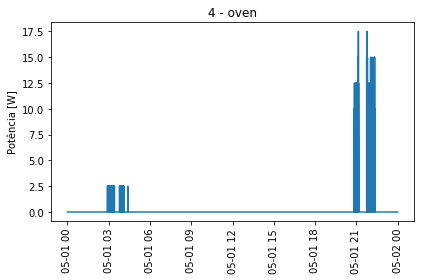

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


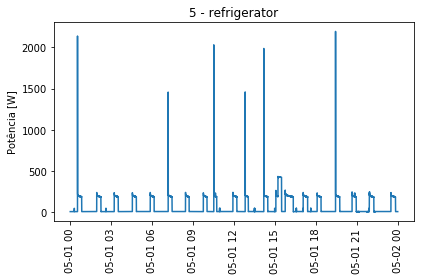

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


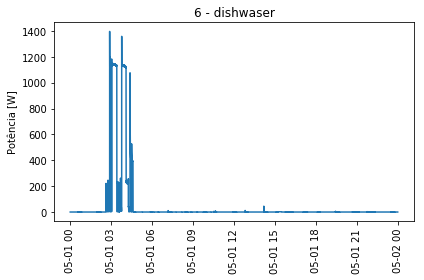

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


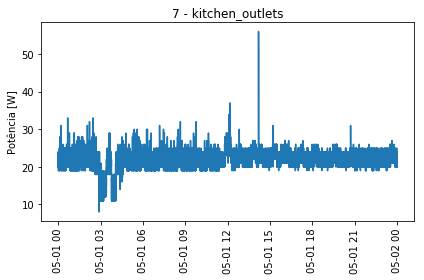

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


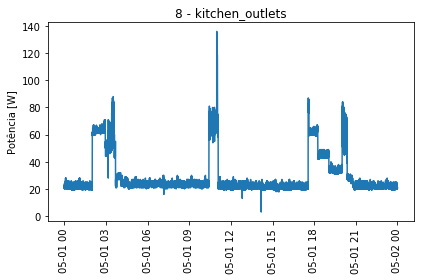

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


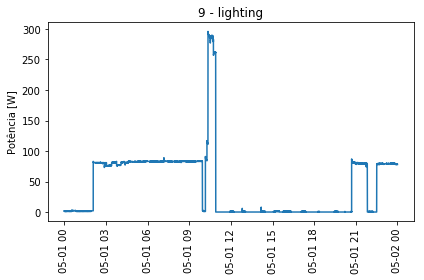

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


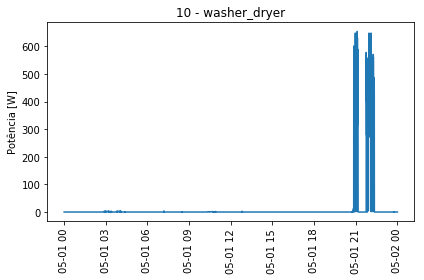

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


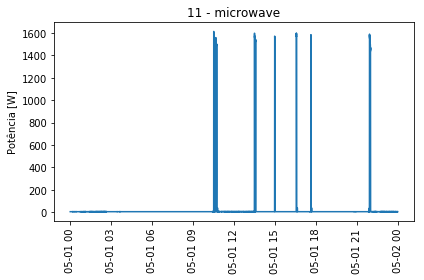

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


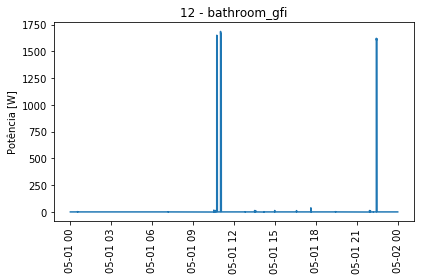

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


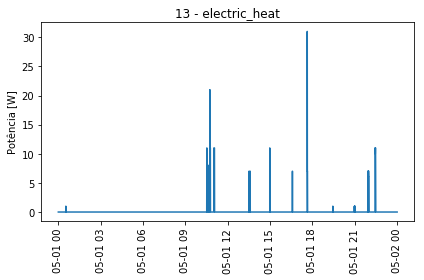

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


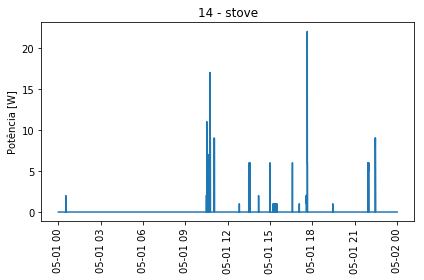

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


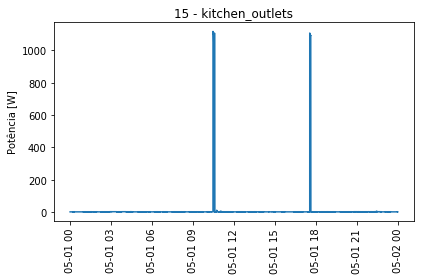

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


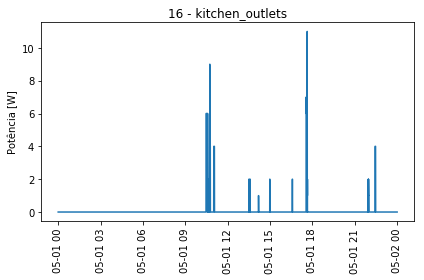

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


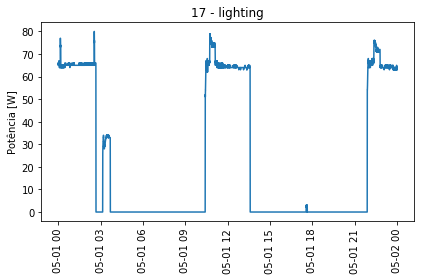

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


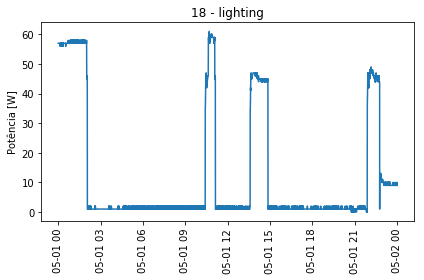

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


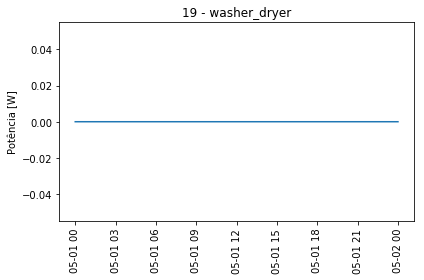

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


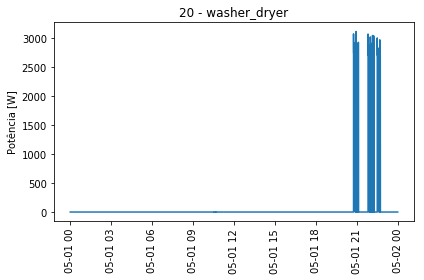

In [3]:
def qry_pot_channel(start, end, i_channel):
    """Runs a query for the potency consumption in a channel in the specified period.
    
    Args:
        start (str) -- start of the period as "YYYY-MM-DD hh:mm:ss".
        end (str) -- end of the period as "YYYY-MM-DD hh:mm:ss"
        i_channel(int) -- index of the channel.
    
    Returns:
        str: csv of the query as [index, time, consumption].
    """
    if i_channel < 1 or i_channel > num_channels:
        raise Exception('Channel number should be 1-{}. The value was {}'.format(len(labels), i_channel))
    
    # Select the desired period from channel
    ch = channels[i_channel - 1]
    mask = (ch.t >= start) & (ch.t < end)
    ch_period = ch.loc[mask]
    
    # Return query as csv string
    return ch_period.to_csv()


# Plot data from day 2011-05-01
for i in range(len(channels)):
    query = qry_pot_channel('2011-05-01', '2011-05-02 00:00:05', i + 1)
    
    # Convert query string to pandas.DataFrame
    ch = pd.read_csv(StringIO(query), delimiter=',', header=0, usecols=[1, 2])
    ch.t = pd.to_datetime(ch.t)
    
    # Plot query results
    plt.plot(ch.t, ch.pot)
    plt.title(str(i + 1) + " - " + labels.iloc[i]['name'])
    plt.ylabel('Potência [W]')
    plt.xticks(rotation=90)
    plt.savefig('plot/day-05-01/channel_{}.png'.format(i + 1))
    plt.show()

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


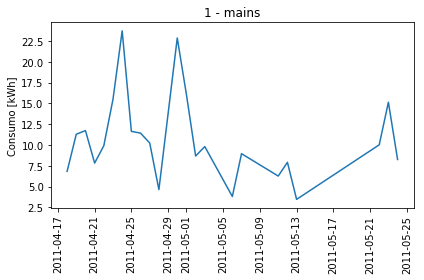

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


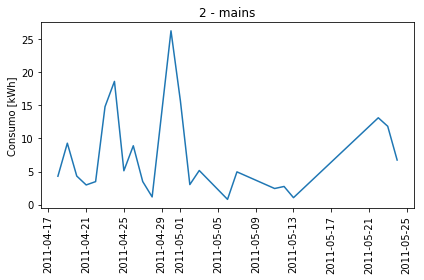

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


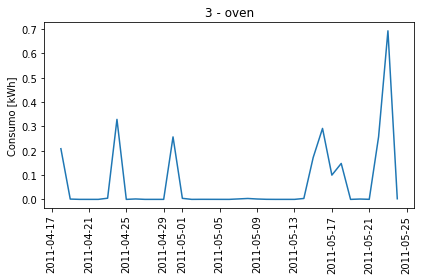

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


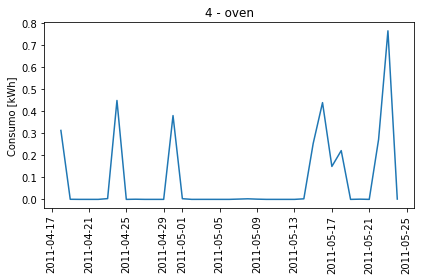

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


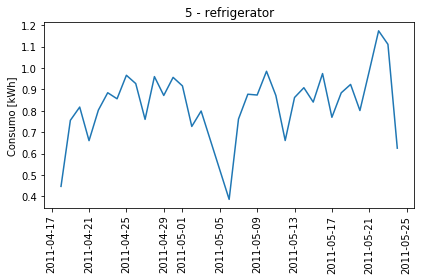

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


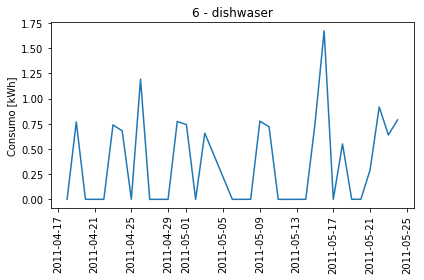

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


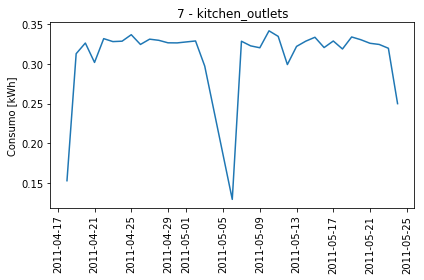

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


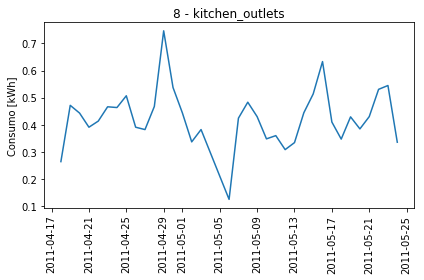

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


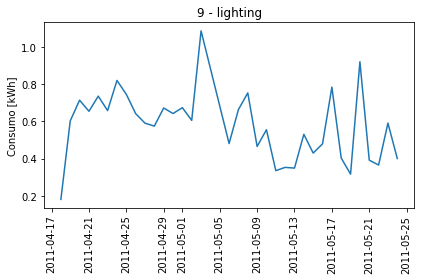

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


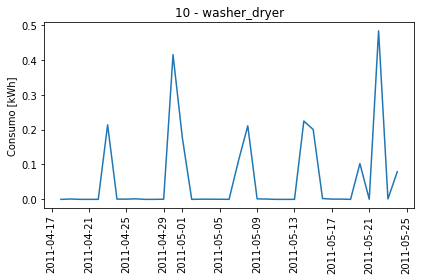

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


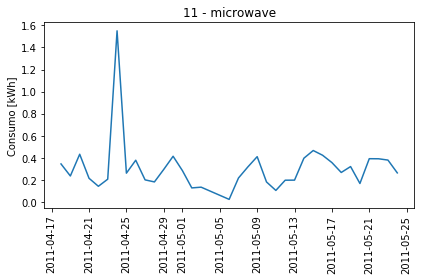

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


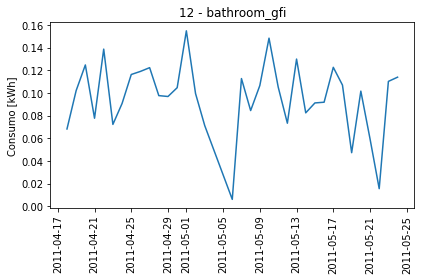

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


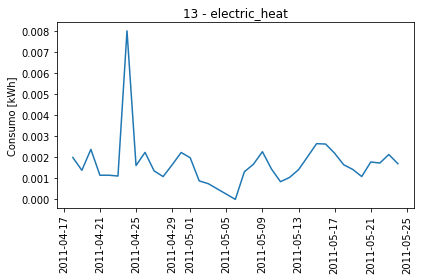

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


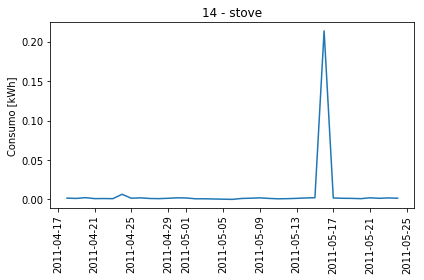

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


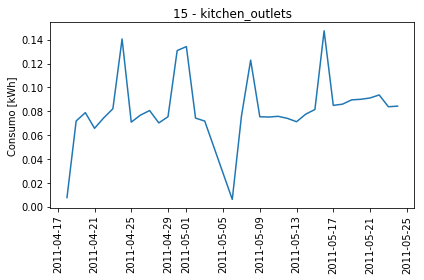

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


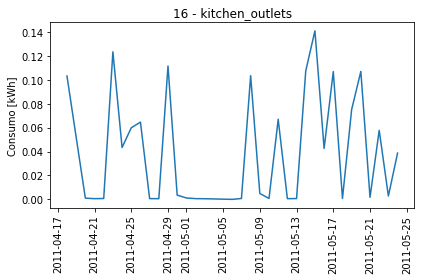

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


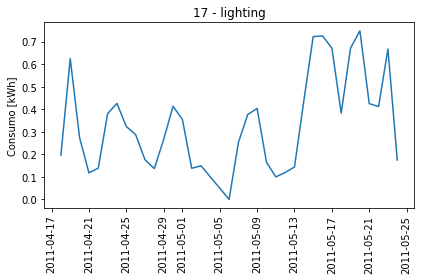

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


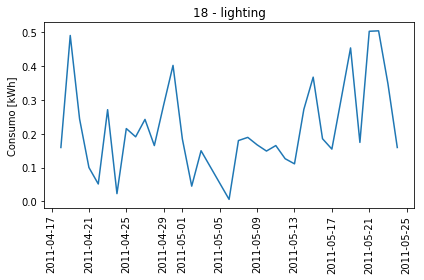

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


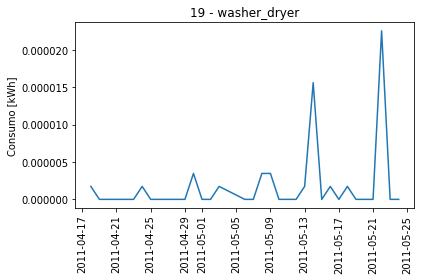

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


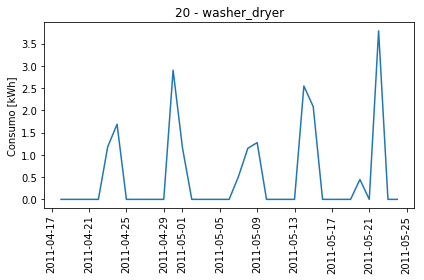

In [4]:
def qry_daily_cons_channel(start, end, i_channel):
    """Runs a query for the daily consumption in a channel in the specified period.
    
    Args:
        start (str) -- start of the period as "YYYY-MM-DD hh:mm:ss".
        end (str) -- end of the period as "YYYY-MM-DD hh:mm:ss".
        i_channel (int) -- index of the channel.
    
    Returns:
        str: csv of the query as [index, date, daily consumption].
    """
    if i_channel < 1 or i_channel > num_channels:
        raise Exception('Channel number should be 1-{}. The value was {}'.format(len(labels), i_channel))
    
    # Select the desired period from channel
    ch = channels[i_channel - 1]
    mask = (ch.t >= start) & (ch.t < end)
    ch_period = ch.loc[mask]
    
    # Aggregate consumption by day
    cons = ch_period.copy()
    cons = cons.set_index('t')
    cons = cons.groupby(pd.Grouper(freq='D')).transform(np.cumsum).resample('D').ohlc()
    cons = cons.reset_index()
    cons = pd.concat([cons.t, cons.pot.high], axis=1)
    cons.columns = ['t', 'energy']
    
    # Remove days without consumption data
    cons = cons[~cons.energy.isna()]
    
    # Convert to kWh. Period between measures is 2.5 s
    cons.energy *= 2.5 / (1e3 * 3600)
    
    # Return query as csv string
    return cons.to_csv()


# Plot daily consumption for each channel for all period available
day_cons = []
for i in range(len(channels)):
    query = qry_daily_cons_channel('2011-04-17', '2011-05-25 00:00:05', i + 1)
    
    cons = pd.read_csv(StringIO(query), delimiter=',', header=0, usecols=[1, 2])
    cons.t = pd.to_datetime(cons.t)
    
    day_cons.append(cons)
    plt.plot(cons.t, cons.energy)
    plt.title(str(i + 1) + " - " + labels.iloc[i]['name'])
    plt.ylabel('Consumo [kWh]')
    plt.xticks(rotation=90)
    plt.savefig('plot/daily/channel_{}.png'.format(i + 1))
    plt.show()

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


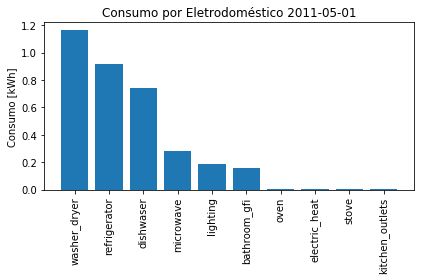

In [5]:
# Plot total consumption by each channel on day 2011-05-01
day_cons = {}
for i in range(2, len(channels)):
    query = qry_daily_cons_channel('2011-04-17', '2011-05-25', i + 1)
    
    cons = pd.read_csv(StringIO(query), delimiter=',', header=0, usecols=[1, 2])
    cons.t = pd.to_datetime(cons.t)
    
    # Add total consumption of channel i to day_cons hash map
    day_cons[labels.iloc[i]['name']] = cons.loc[cons.t == '2011-05-01']['energy'].values[0]

sorted_cons = sorted(day_cons.items(), key=operator.itemgetter(1), reverse=True)

keys = []  # names of the appliances
vals = []  # consumption of the appliances
for key,val in sorted_cons:
    keys.append(key)
    vals.append(val)

plt.title('Consumo por Eletrodoméstico 2011-05-01')
plt.bar(keys, vals)
plt.ylabel('Consumo [kWh]')
plt.xticks(rotation=90)
plt.savefig('plot/day-05-01/by_channel.png')

In [6]:
# ARMA and ARIMA forecast
days_predicted = 7
i_channel = 5

query = qry_daily_cons_channel('2011-04-17', '2011-05-25', i_channel)
cons = pd.read_csv(StringIO(query), delimiter=',', header=0, usecols=[1, 2])
cons.t = pd.to_datetime(cons.t)

test = cons.iloc[:15, :]
test.t = test.t.dt.date

date = test.t.iloc[-1]
predict_dates = []
for i in range(days_predicted + 1):
    predict_dates.append(date)
    date += datetime.timedelta(days=1)

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


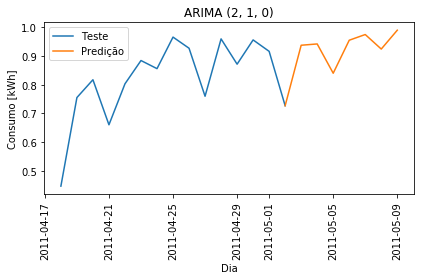

In [7]:
def qry_ARIMA(days_predicted, pdq):
    """Runs a query for the forecast consumption using an ARIMA model.
    
    Args:
        days_predicted (int) -- number of days to forecast.
        pdq (iterable) -- order of the model parameters.
    
    Returns:
        str: csv of the query as [index, date, daily forecasted consumption].
    """
    model = ARIMA(test.energy, pdq)
    model_fit = model.fit(disp=0)
    predicted = model_fit.forecast(days_predicted)
    
    # Add daily consumption of current day
    predict_cons = np.insert(predicted[0], 0, test.energy.iloc[-1])
    
    # Convert to pandas.DataFrame
    result = pd.DataFrame(np.transpose([predict_dates, predict_cons]))
    result.columns = ['t', 'energy']
    
    return result.to_csv()


# Plot forecast for 7 days consumption in channel 5 with ARIMA(2, 1, 0)
query = qry_ARIMA(7, (2, 1, 0))
predict = pd.read_csv(StringIO(query), delimiter=',', header=0, usecols=[1, 2])
predict.t = pd.to_datetime(predict.t)

plt.title('ARIMA (2, 1, 0)')
plt.plot(test.t.values, test.energy.values)
plt.plot(predict.t, predict.energy)
plt.legend(('Teste', 'Predição'))
plt.ylabel('Consumo [kWh]')
plt.xlabel('Dia')
plt.xticks(rotation=90)
plt.savefig('plot/ARIMA/arima210.png')

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


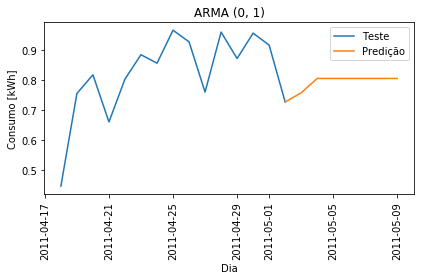

In [8]:
query = qry_ARIMA(7, (0, 0, 1))
predict = pd.read_csv(StringIO(query), delimiter=',', header=0, usecols=[1, 2])
predict.t = pd.to_datetime(predict.t)

plt.title('ARMA (0, 1)')
plt.plot(test.t.values, test.energy.values)
plt.plot(predict.t, predict.energy)
plt.legend(('Teste', 'Predição'))
plt.ylabel('Consumo [kWh]')
plt.xlabel('Dia')
plt.xticks(rotation=90)
plt.savefig('plot/ARIMA/arma01.png')

/home/tiago/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


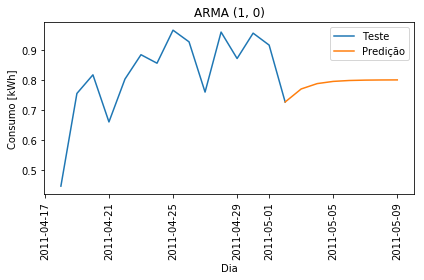

In [9]:
query = qry_ARIMA(7, (1, 0, 0))
predict = pd.read_csv(StringIO(query), delimiter=',', header=0, usecols=[1, 2])
predict.t = pd.to_datetime(predict.t)

plt.title('ARMA (1, 0)')
plt.plot(test.t.values, test.energy.values)
plt.plot(predict.t, predict.energy)
plt.legend(('Teste', 'Predição'))
plt.ylabel('Consumo [kWh]')
plt.xlabel('Dia')
plt.xticks(rotation=90)
plt.savefig('plot/ARIMA/arma10.png')